In [2]:
pip install kmodes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

In [4]:
# import dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# menampilkan data
print (df.head())

  Customer_ID       Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-001         Budi Anggara  ...       Sector              9497927
1    CUST-002     Shirley Ratuwati  ...      Cluster              2722700
2    CUST-003         Agus Cahyono  ...      Cluster              5286429
3    CUST-004     Antonius Winarta  ...      Cluster              5204498
4    CUST-005  Ibu Sri Wahyuni, IR  ...      Cluster             10615206

[5 rows x 7 columns]


In [5]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [6]:
df.describe()

,Umur,NilaiBelanjaSetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

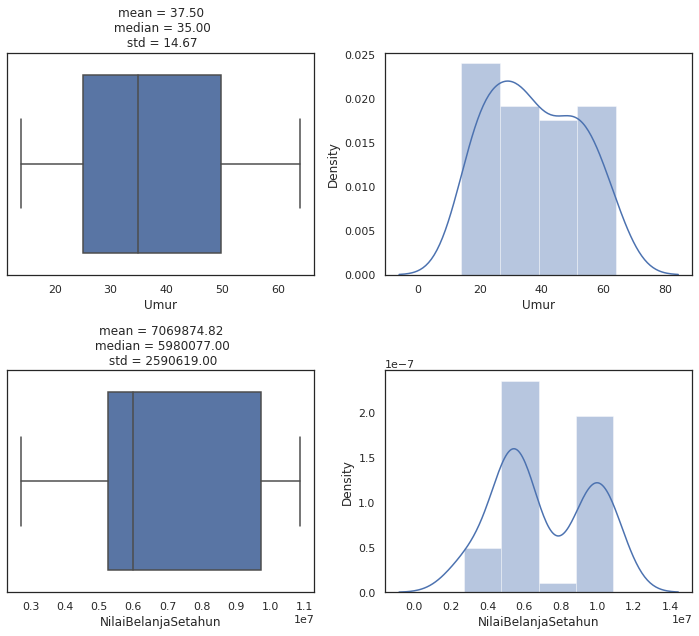

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
  fig, axs = plt.subplots(2, 2, figsize=(10, 9))
  for i, kol in enumerate(features):
    sns.boxplot(df[kol], ax = axs[i][0])
    sns.distplot(df[kol], ax = axs[i][1])
    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
  plt.setp(axs)
  plt.tight_layout()
  plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

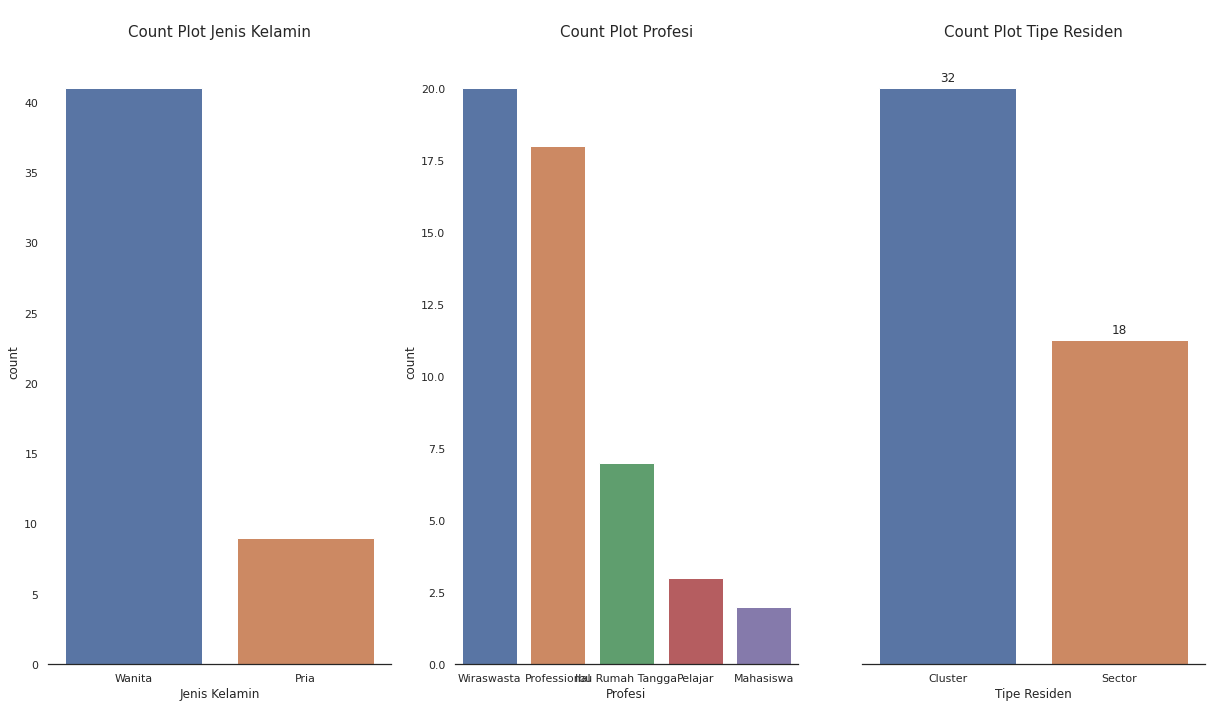

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()

# Menyiapkan kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat canvas
fig, axs = plt.subplots(1,3,figsize=(17,10))

# Membuat plot untuk setiap kolom kategorikal
for i, kol in enumerate(kolom_kategorikal):
# Membuat Plot
  sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])
  axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)

# Memberikan anotasi
for p in axs[i].patches:  
  axs[i].annotate(format(p.get_height(), '.0f'),
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha = 'center',
  va = 'center',
  xytext = (0, 10),
  textcoords = 'offset points')

# Setting Plot
sns.despine(right=True,top = True, left = True)
axs[i].axes.yaxis.set_visible(False)
plt.setp(axs)
plt.tight_layout()

# Tampilkan plot
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


In [21]:
from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
  df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


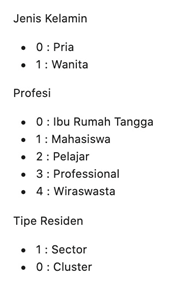

In [26]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print (df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


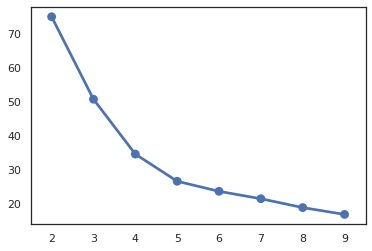

In [28]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost
cost = {}
for k in range(2,10):
  kproto = KPrototypes(n_clusters = k,random_state=75)
  kproto.fit_predict(df_model, categorical=[0,1,2])
  cost[k]= kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

In [29]:
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [35]:
import pandas as pd
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head(10))

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID         Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0    CUST-001           Budi Anggara  ...             9497927        1
1    CUST-002       Shirley Ratuwati  ...             2722700        0
2    CUST-003           Agus Cahyono  ...             5286429        2
3    CUST-004       Antonius Winarta  ...             5204498        2
4    CUST-005    Ibu Sri Wahyuni, IR  ...            10615206        3
5    CUST-006        Rosalina Kurnia  ...             5215541        4
6    CUST-007          Cahyono, Agus  ...             9837260        1
7    CUST-008         Danang Santosa  ...             5223569        2
8    CUST-009  Elisabeth Suryadinata  ...             5993218        4
9    CUST-010         Mario Setiawan  ...             5257448        4

[10 rows x 8 columns]


In [40]:
# Menampilkan data pelanggan berdasarkan cluster nya
for i in range (0,5):
	print('\nPelanggan cluster: {}\n'.format(i))
print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0


Pelanggan cluster: 1


Pelanggan cluster: 2


Pelanggan cluster: 3


Pelanggan cluster: 4

   Customer_ID         Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
5     CUST-006        Rosalina Kurnia  ...             5215541        4
8     CUST-009  Elisabeth Suryadinata  ...             5993218        4
9     CUST-010         Mario Setiawan  ...             5257448        4
15    CUST-016           Bambang Rudi  ...             5262521        4
16    CUST-017              Yuni Sari  ...             5677762        4
22    CUST-023        Denny Amiruddin  ...             5239290        4
27    CUST-028          Adeline Huang  ...             6631680        4
34    CUST-035                Ida Ayu  ...             5962575        4
36    CUST-037       Felicia Tandiono  ...             5972787        4
38    CUST-039           Gina Hidayat  ...             5257775        4
40    CUST-041       Shinta Aritonang  ...             6820976        4
42    CUST-043       

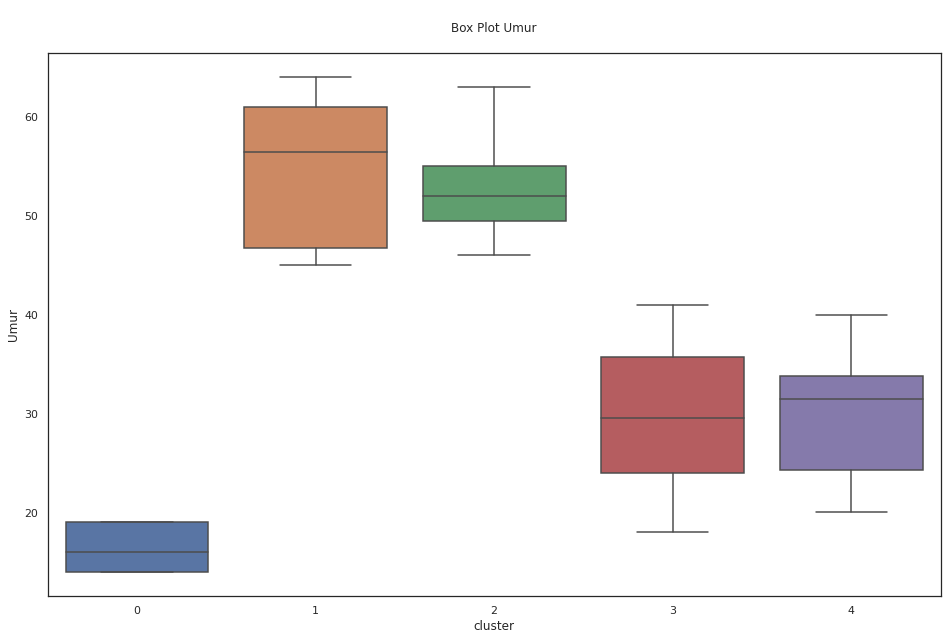

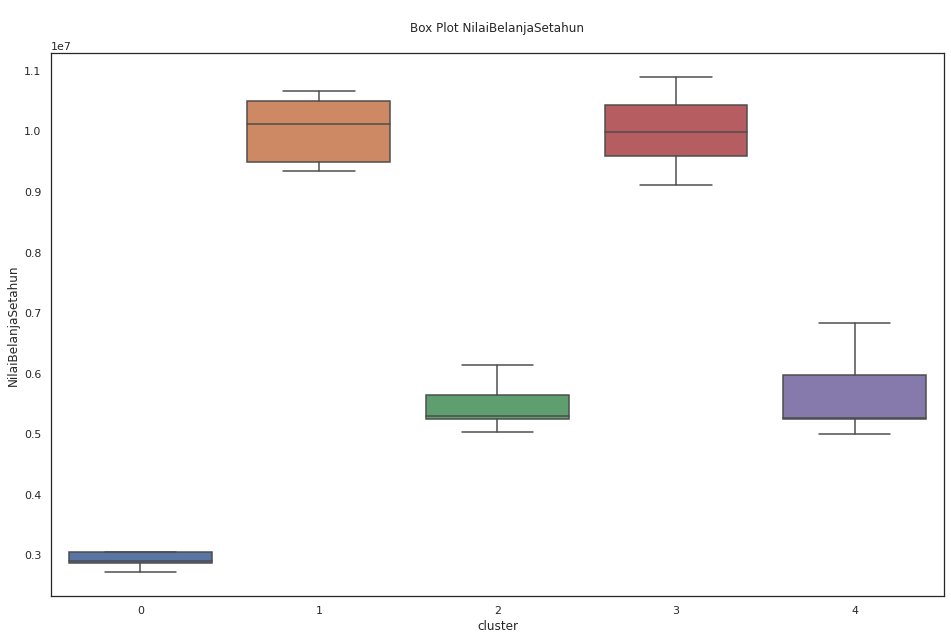

In [42]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']

for i in kolom_numerik:
	plt.figure(figsize=(16,10))
	ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
	plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
	plt.show()  

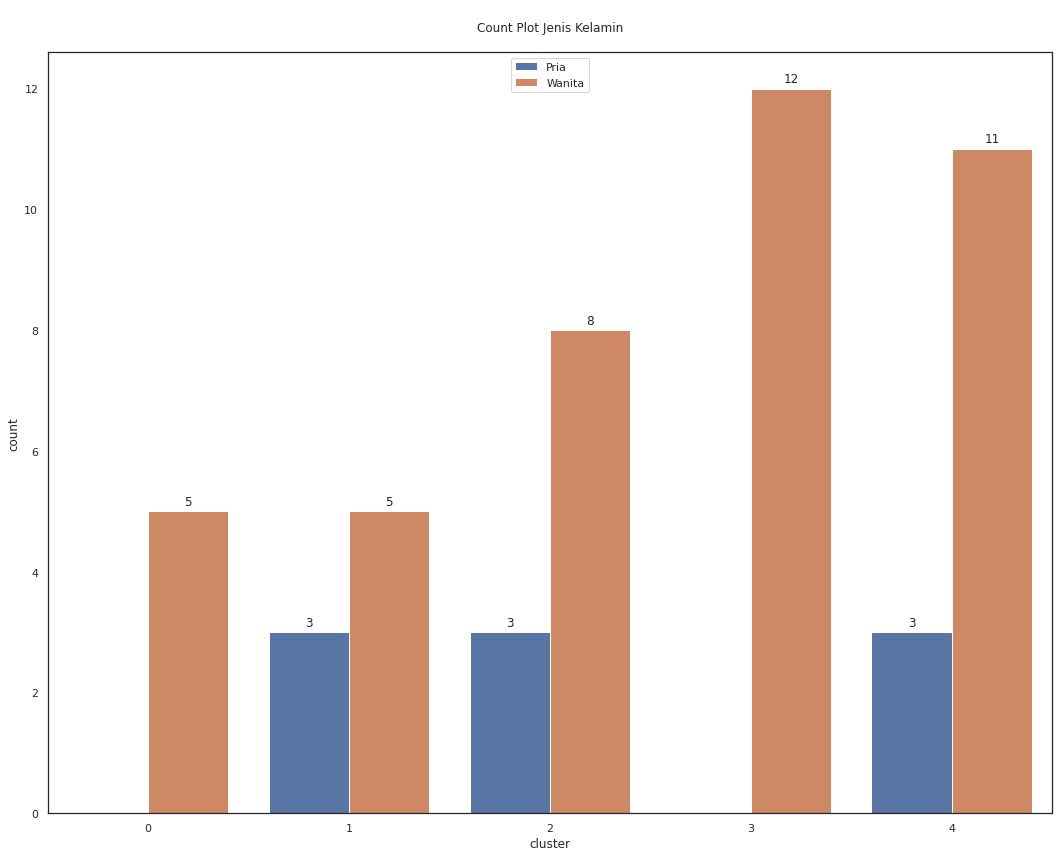

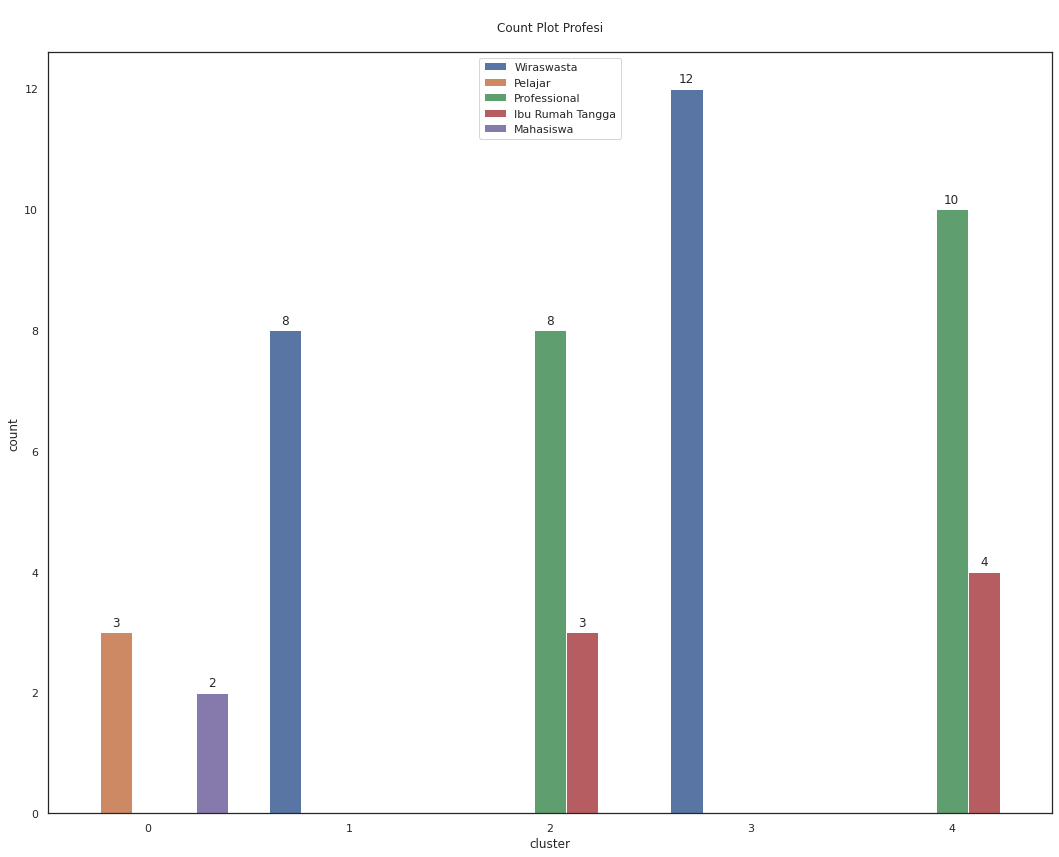

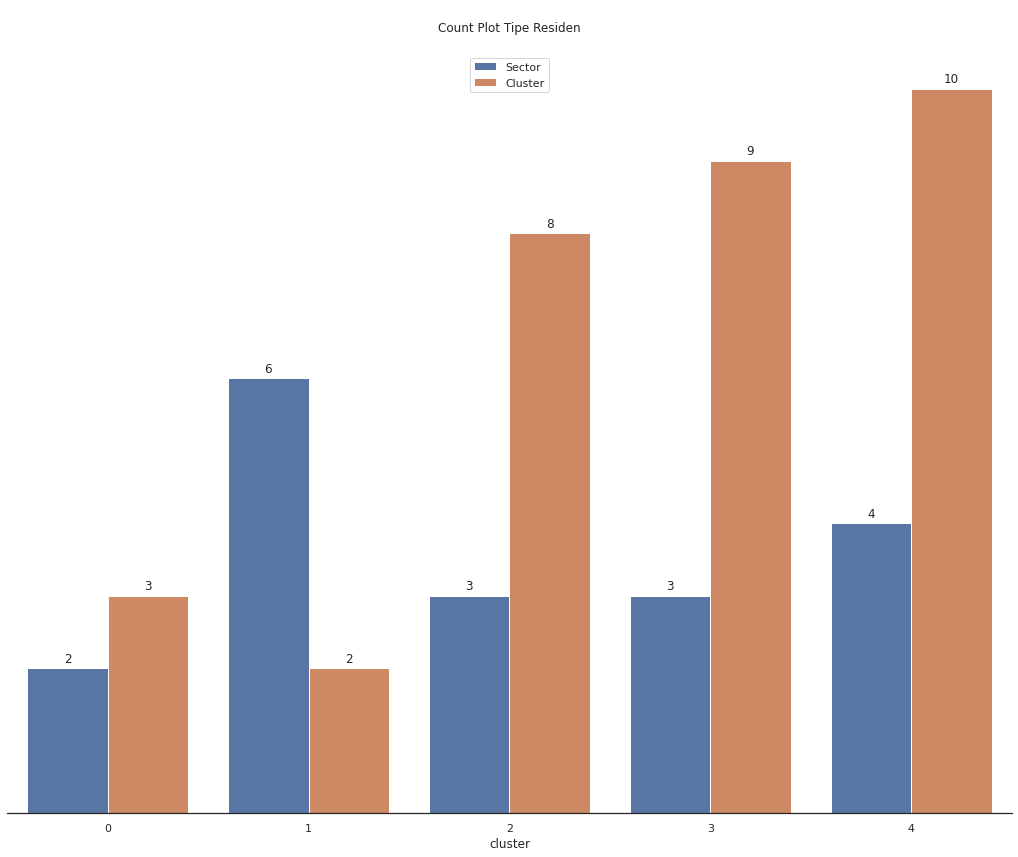

In [45]:
import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

for i in kolom_categorical:
	plt.figure(figsize=(18,14))
	ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
	plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
	ax.legend(loc="upper center")
	for p in ax.patches:
	  ax.annotate(format(p.get_height(), '.0f'),
	  (p.get_x() + p.get_width() / 2., p.get_height()),
	  ha = 'center',
	  va = 'center',
	  xytext = (0, 10),
	  textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

In [46]:
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({
	0: 'Diamond Young Member',
	1: 'Diamond Senior Member',
	2: 'Silver Member',
	3: 'Gold Young Member',
	4: 'Gold Senior Member'
})

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan  ... cluster                 segmen
0    CUST-001         Budi Anggara  ...       1  Diamond Senior Member
1    CUST-002     Shirley Ratuwati  ...       0   Diamond Young Member
2    CUST-003         Agus Cahyono  ...       2          Silver Member
3    CUST